In [1]:
# pip install --upgrade matplotlib

In [1]:
# # to prevent crashing when plotting pytorch 

# import os
# os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"


In [2]:
%pylab inline
plt.style.use("bmh")

Populating the interactive namespace from numpy and matplotlib


In [3]:
plt.rcParams["figure.figsize"] = (6,6)

In [4]:
import numpy as np
import torch

# Creating tensors

## From NumPy arrays

In [5]:
np_a = np.random.randn(2, 3)
torch_a = torch.from_numpy(np_a)

In [6]:
print("NumPy array:")
print(np_a, "\n")
print("PyTorch tensor:")
print(torch_a, "\n")

print(f"NumPy array dtype: {np_a.dtype}")
print(f"PyTorch tensor dtype: {torch_a.dtype}")
print(f"Default PyTorch float: {torch.get_default_dtype()}", "\n")

print(f"Tensor shape: {torch_a.shape}")
print(f"Tensor size: {torch_a.size()}")
print(f"Tensor number of dimensions: {torch_a.dim()}")

NumPy array:
[[-1.3024079  -0.10254981  0.16120081]
 [-1.00429893 -0.41989864  1.07126841]] 

PyTorch tensor:
tensor([[-1.3024, -0.1025,  0.1612],
        [-1.0043, -0.4199,  1.0713]], dtype=torch.float64) 

NumPy array dtype: float64
PyTorch tensor dtype: torch.float64
Default PyTorch float: torch.float32 

Tensor shape: torch.Size([2, 3])
Tensor size: torch.Size([2, 3])
Tensor number of dimensions: 2


Note, that PyTorch reused dtype from the NumPy array. However, `float64` is not the default floating point type for PyTorch:

In [7]:
torch_a = torch.tensor(np_a, dtype=torch.float)

In [8]:
torch_a.dtype

torch.float32

In [9]:
print("NumPy array:")
print(np_a, "\n")
print("PyTorch tensor:")
print(torch_a, "\n")

NumPy array:
[[-1.3024079  -0.10254981  0.16120081]
 [-1.00429893 -0.41989864  1.07126841]] 

PyTorch tensor:
tensor([[-1.3024, -0.1025,  0.1612],
        [-1.0043, -0.4199,  1.0713]]) 



PyTorch numerical types **are not real Python types**:

In [10]:
print(type(np.float32), type(torch.float))

<class 'type'> <class 'torch.dtype'>


## Predefined structure and values

We can create all the common tensor pattern with PyTorch:

In [11]:
torch.arange(10)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
torch.zeros(2, 3)

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [13]:
torch.linspace(0, 10, 20)

tensor([ 0.0000,  0.5263,  1.0526,  1.5789,  2.1053,  2.6316,  3.1579,  3.6842,
         4.2105,  4.7368,  5.2632,  5.7895,  6.3158,  6.8421,  7.3684,  7.8947,
         8.4211,  8.9474,  9.4737, 10.0000])

In [14]:
torch.zeros(2, 5, dtype=torch.bool)

tensor([[False, False, False, False, False],
        [False, False, False, False, False]])

In [15]:
torch.ones(2, 5, dtype=torch.bool)

tensor([[True, True, True, True, True],
        [True, True, True, True, True]])

## Random numbers

Random numbers, however, are created differently in PyTorch:

In [16]:
torch.manual_seed(8436)
a = torch.Tensor(1000)

`a` contains whatever garbage was in memory:

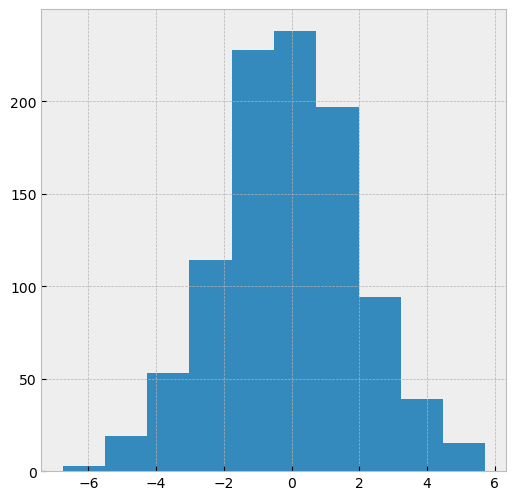

In [17]:
a.normal_(0, 2.)

plt.hist(a);

In [18]:
a

tensor([-2.2919e+00,  4.3263e-01,  1.5736e+00, -2.4028e+00,  3.5446e+00,
         1.3257e+00, -2.5274e-01, -1.7132e+00, -4.1595e-02,  2.3262e+00,
        -1.8660e+00, -8.8658e-02,  3.1620e-01, -5.8752e-01,  2.4293e-01,
        -1.2593e+00, -1.2843e+00,  1.9742e+00, -4.4349e+00,  4.7044e-01,
        -1.6515e+00,  1.7619e+00, -6.6118e-01, -3.2274e-03,  9.1705e-01,
         3.1695e+00,  1.7674e-02, -3.4520e-01,  1.2590e+00,  1.5701e+00,
         3.2448e+00, -3.6098e+00,  3.5049e+00, -7.4172e-01,  1.0931e+00,
        -1.6822e+00, -7.0184e-01,  3.6455e+00,  1.7197e+00, -1.3259e+00,
         2.2786e-01,  3.3308e+00, -1.0896e+00, -1.5249e+00,  1.1883e-01,
        -1.2627e+00,  4.1743e+00,  3.1813e+00, -1.3425e+00, -3.6464e+00,
        -5.7174e-01, -1.7664e+00, -2.0771e+00, -1.0109e+00,  2.4916e+00,
         2.9375e+00,  5.8447e-01, -1.1851e-01,  5.6465e-01, -4.4815e-01,
        -2.5333e+00, -4.3514e-01,  6.2425e-01,  5.2438e-01,  3.0324e+00,
        -1.8246e+00, -2.7478e-01,  2.9988e-01, -6.4

In-place filling of `a` with Gaussian random variable:

Or a uniform disribution:

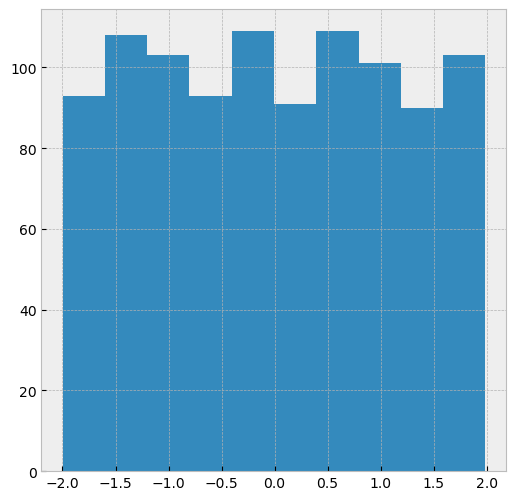

In [19]:
a.uniform_(-2, 2.)

plt.hist(a);

### Using distributions

Other distributions are available via `torch.distributions`:

In [20]:
poisson_sampler = torch.distributions.Poisson(1.)

In [21]:
samples = poisson_sampler.sample((500,))

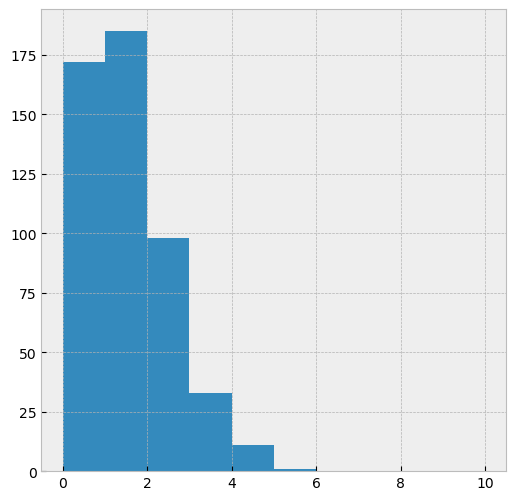

In [22]:
plt.hist(samples, range=(0, 10), bins=10);

# Tensor operations

There are two types of operations in PyTorch: in-place and those, which create a new tensor. In-place operations have `_` in their name as a convention:

In [23]:
a = torch.Tensor(2, 3)
a.normal_()

tensor([[ 0.4440, -1.4291,  0.4397],
        [ 0.8815, -0.1599,  0.0631]])

Operations, which create new arrays do not:

In [24]:
# New tensor
print(a.exp())
print(a)

tensor([[1.5589, 0.2395, 1.5522],
        [2.4145, 0.8523, 1.0652]])
tensor([[ 0.4440, -1.4291,  0.4397],
        [ 0.8815, -0.1599,  0.0631]])


In [25]:
# Inplace version
print(a.exp_())
print(a)

tensor([[1.5589, 0.2395, 1.5522],
        [2.4145, 0.8523, 1.0652]])
tensor([[1.5589, 0.2395, 1.5522],
        [2.4145, 0.8523, 1.0652]])


In [26]:
b = torch.ones(2, 1)
b

tensor([[1.],
        [1.]])

Arithmetics also have two definitions:

In [27]:
# New tensor
a + b

tensor([[2.5589, 1.2395, 2.5522],
        [3.4145, 1.8523, 2.0652]])

In [28]:
a

tensor([[1.5589, 0.2395, 1.5522],
        [2.4145, 0.8523, 1.0652]])

In [29]:
# In-place
a.add_(b)

tensor([[2.5589, 1.2395, 2.5522],
        [3.4145, 1.8523, 2.0652]])

In [30]:
a

tensor([[2.5589, 1.2395, 2.5522],
        [3.4145, 1.8523, 2.0652]])

We can chain both in-place and out-of-place operations, as they all conveniently return a tensor they modified/created:

In [31]:
b.normal_() is b

True

In [32]:
a.exp().div(b)

tensor([[-26.6007,  -7.1106, -26.4242],
        [ 42.2118,   8.8505,  10.9505]])

In [33]:
a.exp_().div_(b)

tensor([[-26.6007,  -7.1106, -26.4242],
        [ 42.2118,   8.8505,  10.9505]])

In [34]:
a

tensor([[-26.6007,  -7.1106, -26.4242],
        [ 42.2118,   8.8505,  10.9505]])

Boolean operations are vectorized as well:

In [35]:
a > 10

tensor([[False, False, False],
        [ True, False,  True]])

In [36]:
a.gt(10)

tensor([[False, False, False],
        [ True, False,  True]])

However:

In [37]:
a.gt_(10)

tensor([[0., 0., 0.],
        [1., 0., 1.]])

# To Python and NumPy

In [38]:
# Shape the same data with PyTorch tensor
a.numpy()

array([[0., 0., 0.],
       [1., 0., 1.]], dtype=float32)

However, for tensors, which are used in gradient computations, we also need to detach them (to be discussed later).

Note, that indexing of single scalar value works differently to NumPy:

In [39]:
a[0, 1]  # this is a scalar, i.e. a 0D tensor

tensor(0.)

To get the value itself:

In [40]:
a[0, 1].item()

0.0

# Reshape and resize

In [41]:
a = torch.randn(3, 8)
a

tensor([[ 0.4624,  0.8010,  0.0088, -0.6515,  0.1222, -0.8257, -0.8824,  0.2366],
        [-0.4493,  1.5208, -0.0795,  0.4408,  1.6152, -1.1586,  0.0503,  0.5047],
        [-0.2154, -1.0154, -1.9036, -0.6831, -1.6028, -0.2423,  2.1295, -0.3248]])

In [42]:
a.view(4, -1)

tensor([[ 0.4624,  0.8010,  0.0088, -0.6515,  0.1222, -0.8257],
        [-0.8824,  0.2366, -0.4493,  1.5208, -0.0795,  0.4408],
        [ 1.6152, -1.1586,  0.0503,  0.5047, -0.2154, -1.0154],
        [-1.9036, -0.6831, -1.6028, -0.2423,  2.1295, -0.3248]])

Views (both direct and coming from indexing) work in a similar fashion to NumPy:

In [43]:
a[::2, ::2]

tensor([[ 0.4624,  0.0088,  0.1222, -0.8824],
        [-0.2154, -1.9036, -1.6028,  2.1295]])

In [44]:
b = a[::2, ::2]
b[0] = 7

In [45]:
a

tensor([[ 7.0000,  0.8010,  7.0000, -0.6515,  7.0000, -0.8257,  7.0000,  0.2366],
        [-0.4493,  1.5208, -0.0795,  0.4408,  1.6152, -1.1586,  0.0503,  0.5047],
        [-0.2154, -1.0154, -1.9036, -0.6831, -1.6028, -0.2423,  2.1295, -0.3248]])

In [46]:
b

tensor([[ 7.0000,  7.0000,  7.0000,  7.0000],
        [-0.2154, -1.9036, -1.6028,  2.1295]])

In [47]:
a[::2, ::2].view(2,2,2)

tensor([[[ 7.0000,  7.0000],
         [ 7.0000,  7.0000]],

        [[-0.2154, -1.9036],
         [-1.6028,  2.1295]]])

In [48]:
print("Original:")
print(a, "\n")
print("Sliced:")
print(a[::2, ::2])

Original:
tensor([[ 7.0000,  0.8010,  7.0000, -0.6515,  7.0000, -0.8257,  7.0000,  0.2366],
        [-0.4493,  1.5208, -0.0795,  0.4408,  1.6152, -1.1586,  0.0503,  0.5047],
        [-0.2154, -1.0154, -1.9036, -0.6831, -1.6028, -0.2423,  2.1295, -0.3248]]) 

Sliced:
tensor([[ 7.0000,  7.0000,  7.0000,  7.0000],
        [-0.2154, -1.9036, -1.6028,  2.1295]])


In [49]:
a.dtype

torch.float32

Unlike Numpy, strides in PyTorch are listed in number of elements, not number of bytes

In [50]:
a[::2, ::2].stride(), a.stride()

((16, 2), (8, 1))

In PyTorch, reshepe can return a view (if possible), but will sometimes return a new tensor (depends on how the original tensor is layed out in device memory)

In [51]:
a[::2, ::2].reshape(4, 2)

tensor([[ 7.0000,  7.0000],
        [ 7.0000,  7.0000],
        [-0.2154, -1.9036],
        [-1.6028,  2.1295]])

In [52]:
a.storage()

 7.0
 0.8010113835334778
 7.0
 -0.6515159010887146
 7.0
 -0.8256800770759583
 7.0
 0.23659545183181763
 -0.4492705762386322
 1.52083158493042
 -0.07945720106363297
 0.44084277749061584
 1.6151646375656128
 -1.1585803031921387
 0.05025297403335571
 0.5047122836112976
 -0.21539880335330963
 -1.0153504610061646
 -1.9035651683807373
 -0.6831154227256775
 -1.602841854095459
 -0.2422603964805603
 2.1294898986816406
 -0.32481861114501953
[torch.storage.TypedStorage(dtype=torch.float32, device=cpu) of size 24]

To get underlying storage:

In [53]:
a[::2, ::2].reshape(2, 2, 2).storage().data_ptr()

1757154057792

In [54]:
a.view(4, 6).storage().data_ptr()==a.storage().data_ptr()

True